Ingrese la función cuadrática a analizar:  x**2-4*x+3


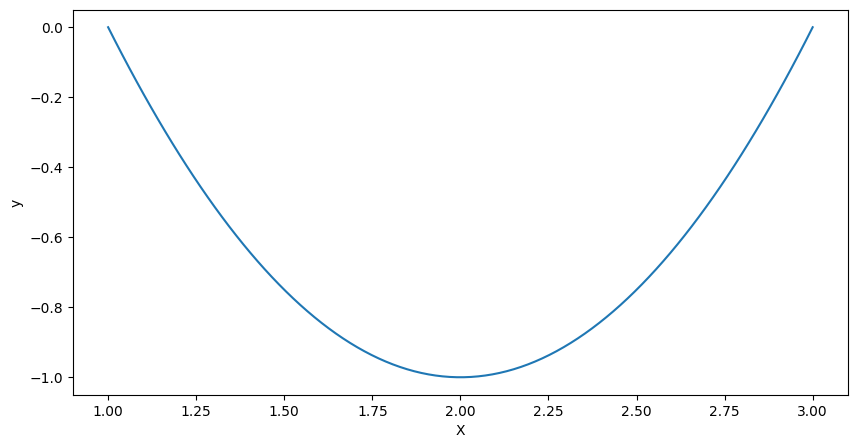

In [39]:
# https://docs.sympy.org/latest/modules/core.html
# https://matplotlib.org/stable/users/explain/quick_start.html#quick-start
# https://stackoverflow.com/questions/14444973/python-global-variable-usage
# https://medium.com/@instailyacademy/best-practices-for-variable-assignments-in-python-dd63c93bd68f
# https://numpy.org/devdocs/user/quickstart.html
# https://docs.sympy.org/latest/modules/evalf.html

import matplotlib.pyplot as plt
import numpy as np
from sympy import *


# Variables globales
x = Symbol('x')
ceros = []
x_sim = None
vertice = None


# Hallar ceros de la funcion
def f_ceros(f, f_):
    cero_ecuacion = Eq(f, 0)
    x_ceros = solve(cero_ecuacion, x)
    if len(x_ceros) != 0:
        for x_cero in x_ceros:
            ceros.append((x_cero, f_(x_cero)))


# Hallar eje_x simetría de la funcion
'''
Idea inicial 1: hallar simetria usando el promedio de los ceros
Idea inicial 2: utilizando formula -b/2a 
Problema 1: ¿Qué pasa si no hay ceros?
Problema 2: no se puede saber valor b y a
Solución: hallar valor x del vertice derivando la funcion
'''
def f_sim(f):
    f_diff = diff(f, x)
    x_sim_ecuacion = Eq(f_diff, 0)
    return solve(x_sim_ecuacion, x)


# Ingresar la función a analizar 
f_str = input("Ingrese la función cuadrática a analizar: ")
f_expr = sympify(f_str)
f_eval = lambdify(x, f_expr)

# Análisis de puntos importantes 
f_ceros(f_expr, f_eval)
x_sim = f_sim(f_expr)
vertice = (x_sim[0], f_eval(x_sim[0]))

# Rango del gráfico de la función
x_values = None

if len(ceros) == 0 or len(ceros) == 1: 
    x_values = np.linspace(vertice[0] - 10, vertice[0] + 10, 100)
elif len(ceros) == 2:
    x_values = np.linspace(float(N(ceros[0][0])), float(N(ceros[1][0])), 100)

y_values = f_eval(x_values)


# Gráfico de la función 
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x_values, y_values, linestyle='-')
ax.set_xlabel('X')
ax.set_ylabel('y')
plt.show()


In [10]:
l = []
for element in l:
    print(l)